In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os


# Any results you write to the current directory are saved as output.

In [2]:
df_hr_disease_original = pd.read_csv('C:\\Users\\20181588\\Desktop\\data\\kaggle data\\heart disease\\Heart_Disease_Prediction.csv')

In [3]:
df_hr_disease = df_hr_disease_original.copy()

Data Exploration

In [4]:
df_hr_disease.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [5]:
print(list(df_hr_disease.columns))

['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease']


In [6]:
df_hr_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [7]:
df_hr_disease['Heart Disease'].value_counts()

Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64

In [8]:
df_hr_disease_target = df_hr_disease['Heart Disease']

C:\Users\20181588\AppData\Local\Temp\ipykernel_31140\1229538069.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Heart Disease", data=df_hr_disease, palette="bwr")


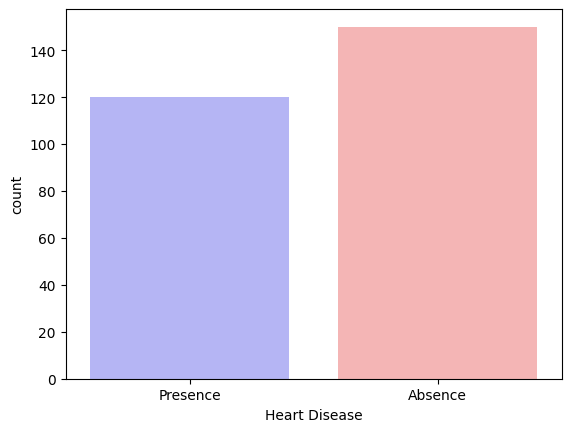

In [9]:
sns.countplot(x="Heart Disease", data=df_hr_disease, palette="bwr")
plt.show()

In [10]:
percentage_presence = (df_hr_disease['Heart Disease'] == 'Presence').mean() * 100
percentage_absence = (df_hr_disease['Heart Disease'] == 'Absence').mean() * 100
print(f"Percentage of patients with heart disease: {percentage_presence:.2f}%")
print(f"Percentage of patients without heart disease: {percentage_absence:.2f}%")



Percentage of patients with heart disease: 44.44%
Percentage of patients without heart disease: 55.56%


C:\Users\20181588\AppData\Local\Temp\ipykernel_31140\1682686428.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df_hr_disease, palette="mako_r")


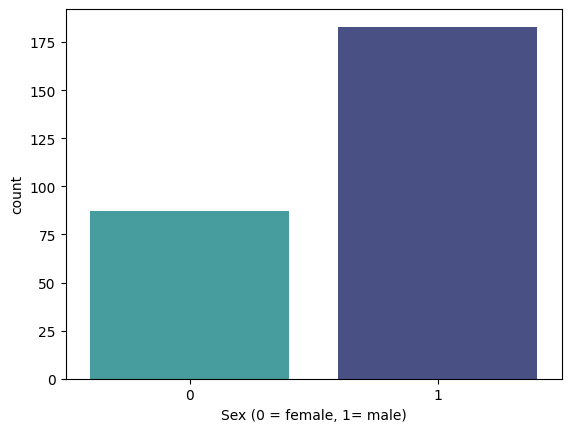

In [11]:
sns.countplot(x='Sex', data=df_hr_disease, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()


In [12]:
countFemale = len(df_hr_disease[df_hr_disease.Sex == 0])
countMale = len(df_hr_disease[df_hr_disease.Sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df_hr_disease.Sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df_hr_disease.Sex))*100)))

Percentage of Female Patients: 32.22%
Percentage of Male Patients: 67.78%


In [13]:
df_hr_disease.groupby('Heart Disease').mean()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
Heart Disease,,,,,,,,,,,,,
Absence,52.706667,0.553333,2.820000,128.866667,244.213333,0.153333,0.860,158.333333,0.153333,0.622667,1.400000,0.286667,3.786667
Presence,56.591667,0.833333,3.616667,134.441667,256.466667,0.141667,1.225,138.858333,0.550000,1.584167,1.816667,1.150000,5.833333


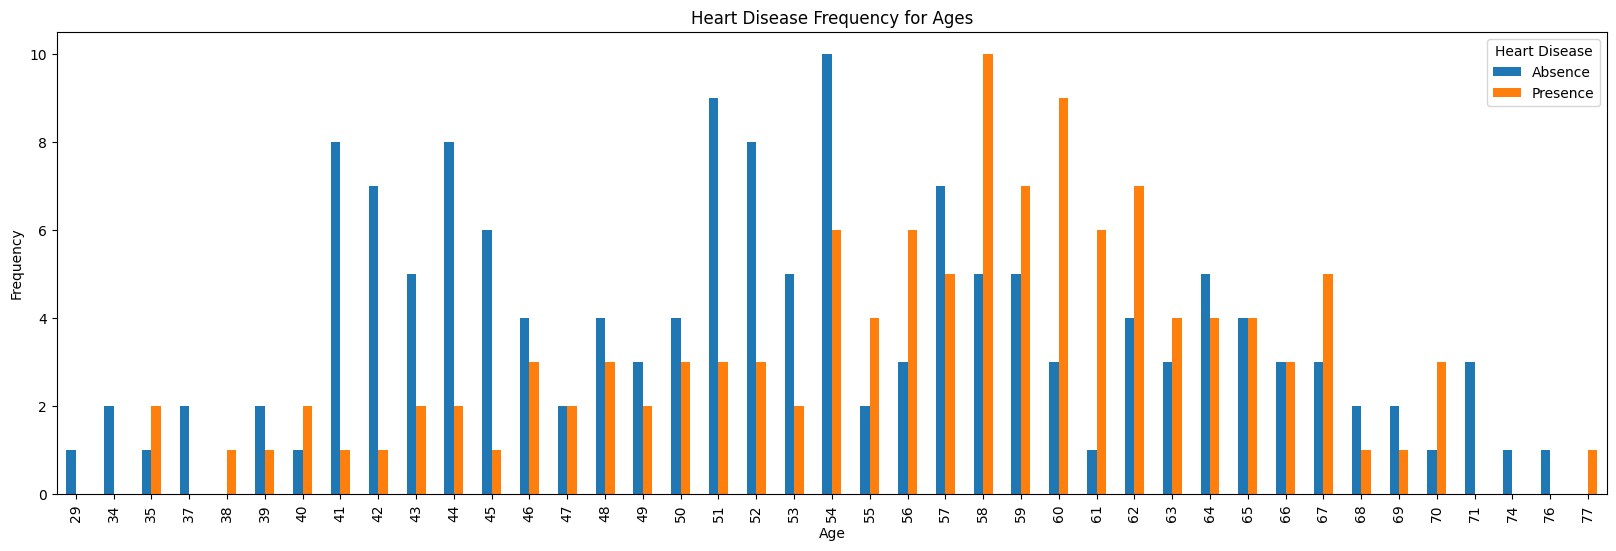

In [14]:
pd.crosstab(df_hr_disease['Age'],df_hr_disease['Heart Disease']).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

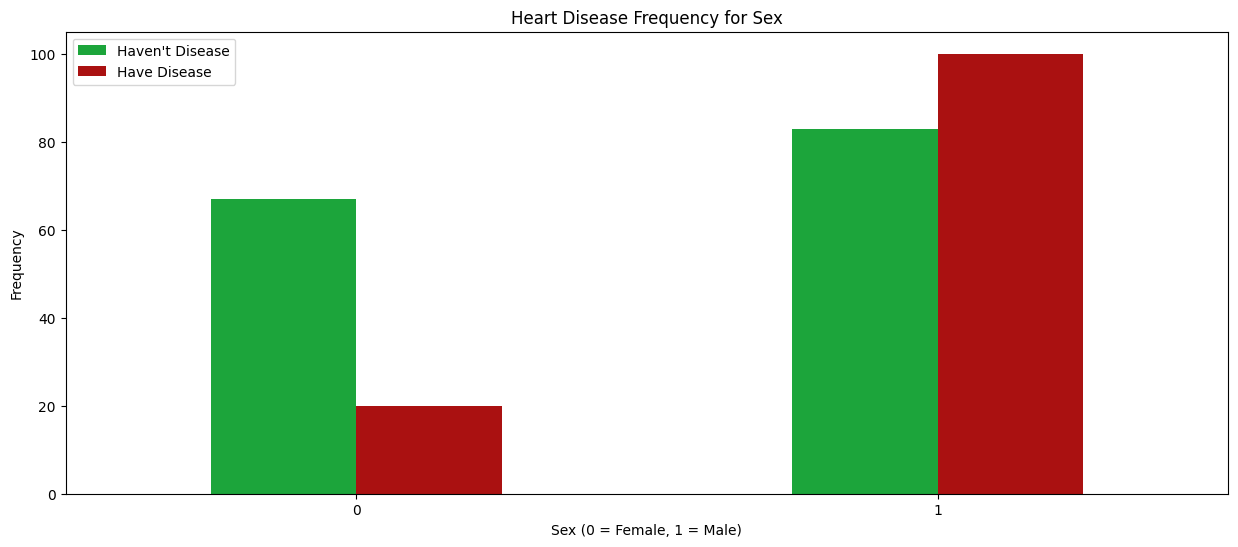

In [15]:
pd.crosstab(df_hr_disease['Sex'],df_hr_disease['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

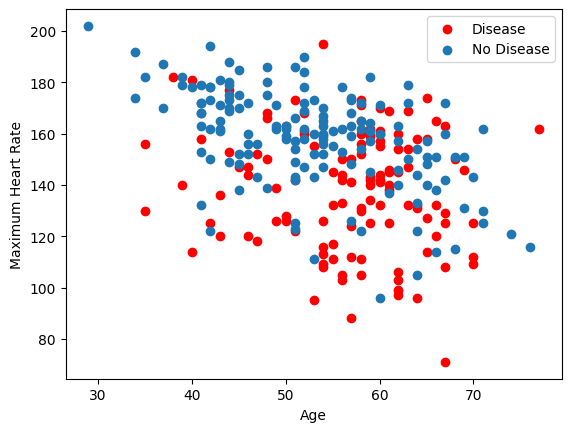

In [16]:
# Assuming df is your DataFrame and it has been correctly loaded.
# Replace df with the name of your DataFrame variable if it's different.

plt.scatter(x=df_hr_disease.Age[df_hr_disease['Heart Disease']=='Presence'], 
            y=df_hr_disease['Max HR'][df_hr_disease['Heart Disease']=='Presence'], c="red")
plt.scatter(x=df_hr_disease.Age[df_hr_disease['Heart Disease']=='Absence'], 
            y=df_hr_disease['Max HR'][df_hr_disease['Heart Disease']=='Absence'])

plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()


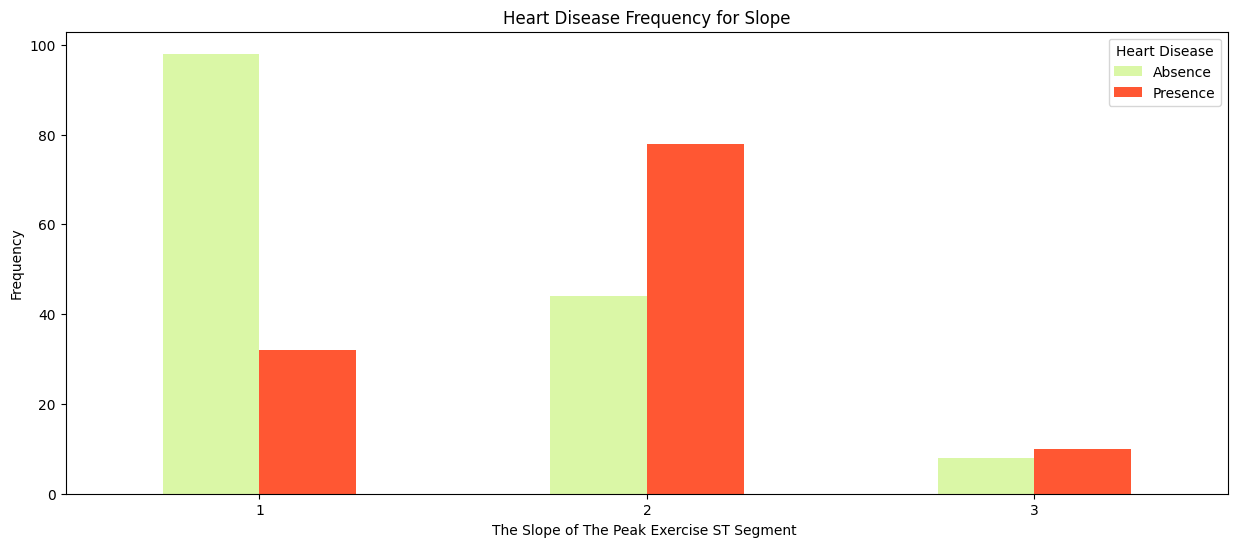

In [17]:
pd.crosstab(df_hr_disease['Slope of ST'],df_hr_disease['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

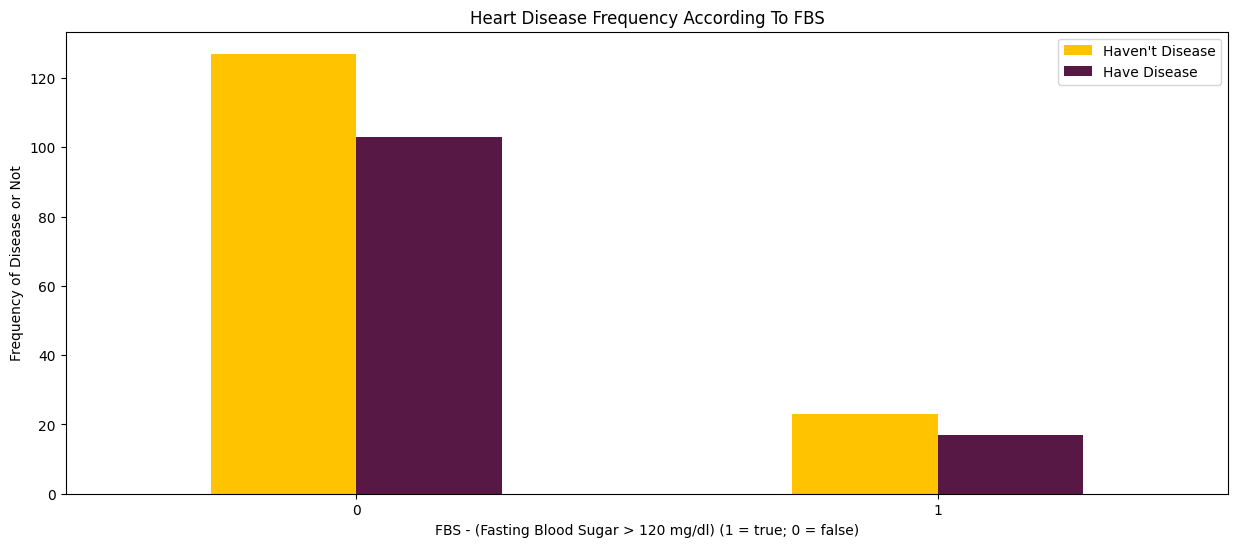

In [18]:
pd.crosstab(df_hr_disease['FBS over 120'],df_hr_disease['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

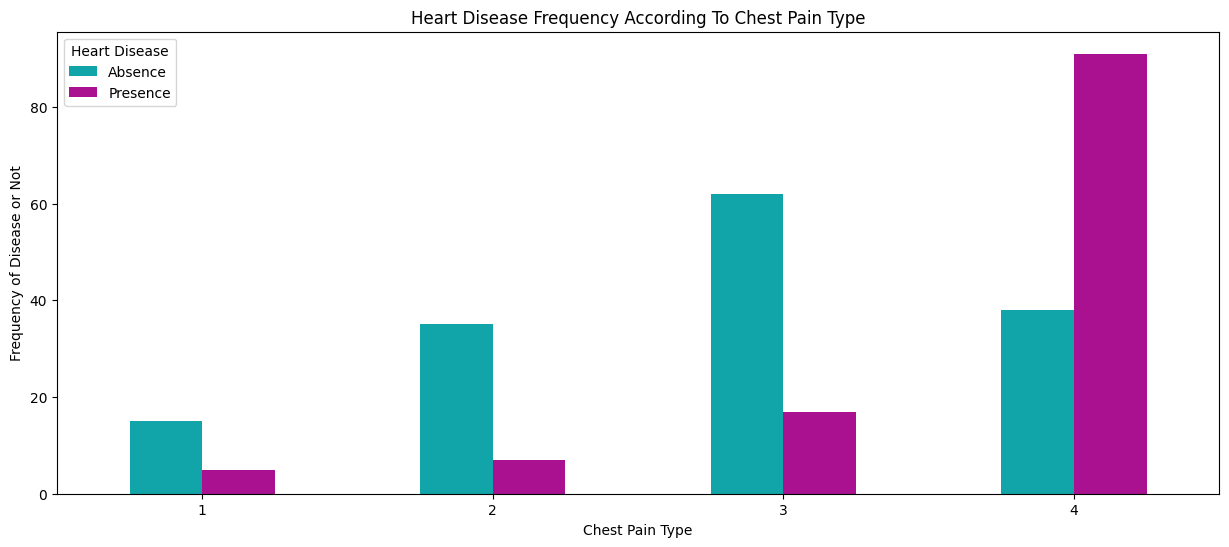

In [19]:
pd.crosstab(df_hr_disease['Chest pain type'],df_hr_disease['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [20]:
# Assuming df_hr_disease is your DataFrame with the heart disease data
# And 'Heart Disease' is the column with values 'Presence' or 'Absence'

# Map 'Presence' to 1 and 'Absence' to 0
df_hr_disease['Heart Disease'] = df_hr_disease['Heart Disease'].map({'Presence': 1, 'Absence': 0})

# Now the 'Heart Disease' column will have binary values 1 or 0

In [21]:
df_hr_disease.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [22]:
# Creating dummy variables for the categorical columns
a = pd.get_dummies(df_hr_disease['Chest pain type'], prefix="cp").astype(int)
b = pd.get_dummies(df_hr_disease['Thallium'], prefix="thal").astype(int)
c = pd.get_dummies(df_hr_disease['Slope of ST'], prefix="slope").astype(int)

# Concatenating the dummy variables with the original dataframe
frames = [df_hr_disease, a, b, c]
df_hr_disease = pd.concat(frames, axis=1)

# Display the first few rows of the updated dataframe
df_hr_disease.head()



,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,...,cp_1,cp_2,cp_3,cp_4,thal_3,thal_6,thal_7,slope_1,slope_2,slope_3
0,70,1,4,130,322,0,2,109,0,2.4,...,0,0,0,1,1,0,0,0,1,0
1,67,0,3,115,564,0,2,160,0,1.6,...,0,0,1,0,0,0,1,0,1,0
2,57,1,2,124,261,0,0,141,0,0.3,...,0,1,0,0,0,0,1,1,0,0
3,64,1,4,128,263,0,0,105,1,0.2,...,0,0,0,1,0,0,1,0,1,0
4,74,0,2,120,269,0,2,121,1,0.2,...,0,1,0,0,1,0,0,1,0,0


In [23]:
# Drop the original categorical columns after creating dummy variables
df_hr_disease = df_hr_disease.drop(columns=['Chest pain type', 'Thallium', 'Slope of ST'])

# Display the first few rows of the updated dataframe
df_hr_disease.head()


,Age,Sex,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Number of vessels fluro,...,cp_1,cp_2,cp_3,cp_4,thal_3,thal_6,thal_7,slope_1,slope_2,slope_3
0,70,1,130,322,0,2,109,0,2.4,3,...,0,0,0,1,1,0,0,0,1,0
1,67,0,115,564,0,2,160,0,1.6,0,...,0,0,1,0,0,0,1,0,1,0
2,57,1,124,261,0,0,141,0,0.3,0,...,0,1,0,0,0,0,1,1,0,0
3,64,1,128,263,0,0,105,1,0.2,1,...,0,0,0,1,0,0,1,0,1,0
4,74,0,120,269,0,2,121,1,0.2,1,...,0,1,0,0,1,0,0,1,0,0


Machine Learning Algorithms

Logistic Regression

In [24]:
y = df_hr_disease['Heart Disease'].values
x_data = df_hr_disease.drop(['Heart Disease'], axis = 1)

In [25]:
import numpy as np

# Assuming x_data is your features DataFrame without the 'Heart Disease' column
# Normalize each column in the DataFrame
X = (x_data - x_data.min()) / (x_data.max() - x_data.min())

# Now X is a DataFrame with normalized values


In [26]:
#print(y)
#print(X)

In [27]:
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

# Create StratifiedKFold object
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# Create the classifiers
logreg = LogisticRegression(solver='liblinear', random_state=42)
svm = SVC(probability=True, random_state=42)
dtree = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
gnb = GaussianNB()

# Dictionary of classifiers
classifiers = {
    'Logistic Regression': logreg,
    'SVM': svm,
    'Decision Tree': dtree,
    'KNN': knn,
    'Random Forest': rf,
    'XGBoost': xgb,
    'Naive Bayes': gnb
}

# Perform 5-fold cross-validation for each classifier
for name, clf in classifiers.items():
    print(f"Results for {name}:")
    
    # Lists to store metrics for each fold
    accuracy_scores = []
    auc_scores = []
    sensitivity_scores = []
    specificity_scores = []
    
    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Fit the model
        clf.fit(X_train, y_train)
        
        # Predict probabilities if the classifier supports it, else use class predictions
        if hasattr(clf, "predict_proba"):
            y_pred_proba = clf.predict_proba(X_test)[:, 1]
            auc = roc_auc_score(y_test, y_pred_proba)
        else:
            y_pred_proba = clf.predict(X_test)
            auc = roc_auc_score(y_test, y_pred_proba)
        
        # Predict class labels
        y_pred = clf.predict(X_test)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        sensitivity = recall_score(y_test, y_pred)
        
        # Specificity calculation
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        specificity = tn / (tn + fp)
        
        # Append metrics to the lists
        accuracy_scores.append(accuracy)
        auc_scores.append(auc)
        sensitivity_scores.append(sensitivity)
        specificity_scores.append(specificity)
    
    # Calculate mean metrics
    mean_accuracy = np.mean(accuracy_scores)
    mean_auc = np.mean(auc_scores)
    mean_sensitivity = np.mean(sensitivity_scores)
    mean_specificity = np.mean(specificity_scores)
    
    # Print the results for the classifier
    print(f"Accuracy: {mean_accuracy:.4f}, AUC: {mean_auc:.4f}, Sensitivity: {mean_sensitivity:.4f}, Specificity: {mean_specificity:.4f}\n")


Results for Logistic Regression:
Accuracy: 0.8407, AUC: 0.9036, Sensitivity: 0.8083, Specificity: 0.8667

Results for SVM:
Accuracy: 0.8037, AUC: 0.8919, Sensitivity: 0.7500, Specificity: 0.8467

Results for Decision Tree:
Accuracy: 0.7111, AUC: 0.7083, Sensitivity: 0.6833, Specificity: 0.7333

Results for KNN:
Accuracy: 0.8185, AUC: 0.8610, Sensitivity: 0.8083, Specificity: 0.8267

Results for Random Forest:
Accuracy: 0.8148, AUC: 0.8839, Sensitivity: 0.7500, Specificity: 0.8667

Results for XGBoost:


c:\Users\20181588\Desktop\code\phd\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\20181588\Desktop\code\phd\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\20181588\Desktop\code\phd\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\20181588\Desktop\code\phd\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

Accuracy: 0.7963, AUC: 0.8558, Sensitivity: 0.7417, Specificity: 0.8400

Results for Naive Bayes:
Accuracy: 0.8333, AUC: 0.8842, Sensitivity: 0.8083, Specificity: 0.8533



c:\Users\20181588\Desktop\code\phd\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\20181588\Desktop\code\phd\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\20181588\Desktop\code\phd\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\20181588\Desktop\code\phd\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

In [28]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# This dictionary will hold the ROC curve data
roc_data = {}

# Perform 5-fold cross-validation for each classifier and store ROC data
for name, clf in classifiers.items():
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        clf.fit(X_train, y_train)
        
        if hasattr(clf, "predict_proba"):
            y_pred_proba = clf.predict_proba(X_test)[:, 1]
        else:  # Use decision function if predict_proba is not available
            y_pred_proba = clf.decision_function(X_test)
            # Normalize decision function to 0-1
            y_pred_proba = (y_pred_proba - y_pred_proba.min()) / (y_pred_proba.max() - y_pred_proba.min())
        
        # Calculate false positives and true positives
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
    
    # Store the mean and the area under the curve for later plotting
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    roc_data[name] = {
        'mean_fpr': mean_fpr,
        'mean_tpr': mean_tpr,
        'mean_auc': mean_auc,
        'std_auc': std_auc
    }
    
# Now roc_data contains the average ROC data for each classifier


c:\Users\20181588\Desktop\code\phd\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\20181588\Desktop\code\phd\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\20181588\Desktop\code\phd\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\20181588\Desktop\code\phd\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

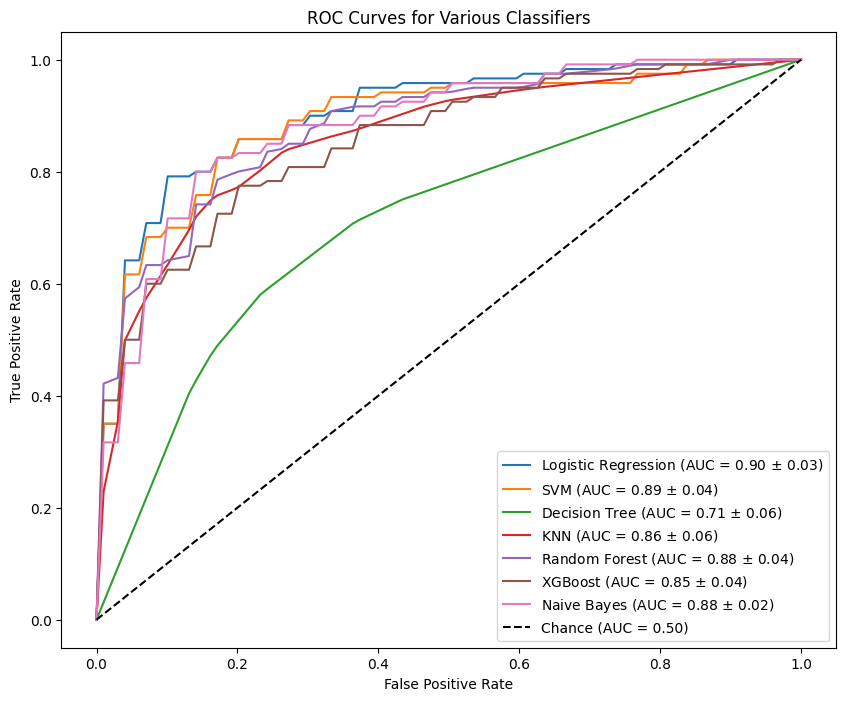

In [29]:
# Plot the ROC curves
plt.figure(figsize=(10, 8))

for name in roc_data:
    data = roc_data[name]
    plt.plot(data['mean_fpr'], data['mean_tpr'], label=f"{name} (AUC = {data['mean_auc']:.2f} $\pm$ {data['std_auc']:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Chance (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Various Classifiers')
plt.legend(loc='lower right')
plt.show()


In [30]:
"""
from sklearn.metrics import confusion_matrix
import numpy as np

# This dictionary will hold the confusion matrix data
conf_matrix_data = {}

# Perform 5-fold cross-validation for each classifier and store confusion matrix data
for name, clf in classifiers.items():
    cms = []  # Store confusion matrices for each fold

    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        # Calculate confusion matrix and normalize it
        cm = confusion_matrix(y_test, y_pred, normalize='true')
        cms.append(cm)

    # Calculate mean confusion matrix
    mean_cm = np.mean(cms, axis=0)
    conf_matrix_data[name] = mean_cm

# Now conf_matrix_data contains the average normalized confusion matrix for each classifier
"""


"\nfrom sklearn.metrics import confusion_matrix\nimport numpy as np\n\n# This dictionary will hold the confusion matrix data\nconf_matrix_data = {}\n\n# Perform 5-fold cross-validation for each classifier and store confusion matrix data\nfor name, clf in classifiers.items():\n    cms = []  # Store confusion matrices for each fold\n\n    for train_index, test_index in cv.split(X, y):\n        X_train, X_test = X.iloc[train_index], X.iloc[test_index]\n        y_train, y_test = y[train_index], y[test_index]\n        \n        clf.fit(X_train, y_train)\n        y_pred = clf.predict(X_test)\n        \n        # Calculate confusion matrix and normalize it\n        cm = confusion_matrix(y_test, y_pred, normalize='true')\n        cms.append(cm)\n\n    # Calculate mean confusion matrix\n    mean_cm = np.mean(cms, axis=0)\n    conf_matrix_data[name] = mean_cm\n\n# Now conf_matrix_data contains the average normalized confusion matrix for each classifier\n"

In [31]:
"""
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot a confusion matrix
def plot_confusion_matrix(cm, classifier_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt=".2f", cmap='Blues', cbar=False)
    plt.title(f'Normalized Confusion Matrix: {classifier_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Plot the confusion matrices for each classifier
for name in conf_matrix_data:
    plot_confusion_matrix(conf_matrix_data[name], name)
"""

'\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\n# Function to plot a confusion matrix\ndef plot_confusion_matrix(cm, classifier_name):\n    plt.figure(figsize=(8, 6))\n    sns.heatmap(cm, annot=True, fmt=".2f", cmap=\'Blues\', cbar=False)\n    plt.title(f\'Normalized Confusion Matrix: {classifier_name}\')\n    plt.ylabel(\'True Label\')\n    plt.xlabel(\'Predicted Label\')\n    plt.show()\n\n# Plot the confusion matrices for each classifier\nfor name in conf_matrix_data:\n    plot_confusion_matrix(conf_matrix_data[name], name)\n'